The MNIST database (Modified National Institute of Standards and Technology database) of handwritten digits consists of a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. Additionally, the black and white images from NIST were size-normalized and centered to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

This database is well liked for training and testing in the field of machine learning and image processing. It is a remixed subset of the original NIST datasets. One half of the 60,000 training images consist of images from NIST's testing dataset and the other half from Nist's training set. The 10,000 images from the testing set are similarly assembled.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import dill

%matplotlib inline

### import data

In [8]:
import pickle
import bz2


def save(filename, data):
    try:
        with bz2.BZ2File(filename, 'wb') as f:
            pickle.dump(data, f)
    
    except:
        print('File ' + filename + ' cannot be written\n')
        return


def load(filename):
    try:
        with bz2.BZ2File(filename, 'rb') as f:
            data = pickle.load(f)
        return data
    except:
        print('File ' + filename + ' cannot be read\n')
        return

In [9]:
# load data

data_path='data/'
data = load(filename=data_path + 'mnist.pkl')

train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]

In [10]:
# save data

data_path='data/'
data = train_imgs, test_imgs, train_labels ,test_labels, train_labels_one_hot, test_labels_one_hot
save(filename=data_path + 'mnist.pkl', data=data)

In [11]:
X_train = train_imgs
X_test = test_imgs
y_train = train_labels_one_hot
y_test = test_labels_one_hot

### read from csv file

In [ ]:
image_size = 28
number_of_classes = 10
image_pixels = image_size * image_size
data_path = "data/"
train_data = np.loadtxt(data_path + "mnist_train.csv", delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",")


In [ ]:
factor = 1.0 / 255
train_imgs = np.asfarray(train_data[:, 1:], dtype=np.float64) / 255    # * factor + 0.01
test_imgs = np.asfarray(test_data[:, 1:], dtype=np.float64) / 255      # * factor + 0.01

train_labels = np.asfarray(train_data[:, :1], dtype=np.float)
test_labels = np.asfarray(test_data[:, :1], dtype=np.float)

lr = np.arange(number_of_classes)

# one hot representation
train_labels_one_hot = (lr == train_labels).astype(np.float)
test_labels_one_hot = (lr == test_labels).astype(np.float)


train_labels_one_hot[train_labels_one_hot == 0] = 0.0     # 0.01
train_labels_one_hot[train_labels_one_hot == 1] = 1.0     # 0.99
test_labels_one_hot[test_labels_one_hot == 0] = 0.0       # 0.01
test_labels_one_hot[test_labels_one_hot == 1] = 1.0       # 0.99


In [ ]:
###!!!
factor = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:], dtype=np.float64) * factor + 0.01    # * factor + 0.01
test_imgs = np.asfarray(test_data[:, 1:], dtype=np.float64) * factor + 0.01      # * factor + 0.01

train_labels = np.asfarray(train_data[:, :1], dtype=np.float)
test_labels = np.asfarray(test_data[:, :1], dtype=np.float)

lr = np.arange(number_of_classes)

# one hot representation
train_labels_one_hot = (lr == train_labels).astype(np.float)
test_labels_one_hot = (lr == test_labels).astype(np.float)


train_labels_one_hot[train_labels_one_hot == 0] = 0.01     # 0.01
train_labels_one_hot[train_labels_one_hot == 1] = 0.99     # 0.99
test_labels_one_hot[test_labels_one_hot == 0] = 0.01       # 0.01
test_labels_one_hot[test_labels_one_hot == 1] = 0.99       # 0.99


### load from keras

In [ ]:
from tensorflow import keras

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

y_train = tf.keras.utils.to_categorical(y_train, 10).T
y_test = tf.keras.utils.to_categorical(y_test, 10).T

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)
y_train = y_train.T
y_test = y_test.T

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

## data examples

In [ ]:
X_train = train_imgs
X_test = test_imgs
y_train = train_labels_one_hot
y_test = test_labels_one_hot


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

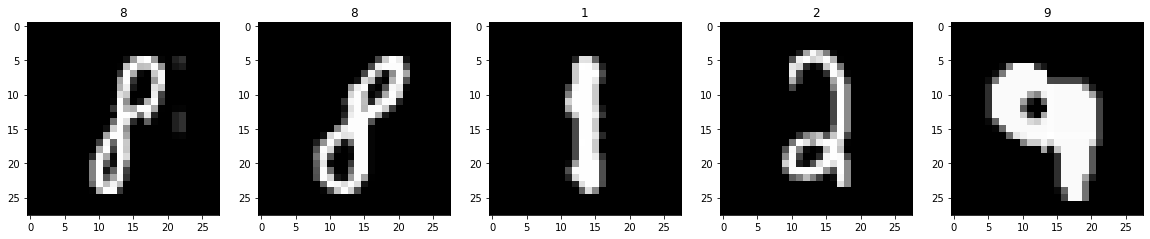

In [8]:
image_size = 28

nrows, ncols = 1, 5
idx = np.random.randint(0, X_train.shape[0])
img = X_train[idx,:].reshape((image_size,image_size))

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for ax in axs:
    idx = np.random.randint(0, X_train.shape[0])
    img = X_train[idx,:].reshape((image_size,image_size))
    label = np.argmax(y_train[idx,:])
    ax.imshow(img, cmap='gray')
    ax.set_title(str(label))
    

plt.show()

## Initilizers

fan_in is number of inputs to a hidden unit = $n^{[l-1]}$ (the number of neuron in layer $l-1$).  
fan_out is number of outputs to a hidden unit = $n^{[l]}$
- **Random normal initialization** (Normal distribution with zero mean and $0.05$ standard deviation)

$$
W^{[l]} \sim N(\mu = 0, \sigma^2 = 25 * 10^{-4})
$$

- **Random uniform initialization** (Uniform distribution within $[-limit, limit]$, where $limit = 0.05$)
$$
W^{[l]} \sim U(-0.05, \: +0.05)
$$

---
- **Xavier(Glorot) normal initialization** (Normal distribution with zero mean and $\sqrt{\frac{2}{n^{[l-1]} + n^{[l]}}}$ standard deviation)
$$
W^{[l]} \sim N(\mu = 0, \sigma^2 = \frac{2}{n^{[l-1]} + n^{[l]}} )
$$

- **Xavier(Glorot) uniform initialization** (Uniform distribution within $[-limit, limit]$, where $limit = \sqrt{\frac{6}{n^{[l-1]} + n^{[l]}}}$)
$$
W^{[l]} \sim U(-\sqrt{\frac{6}{n^{[l-1]} + n^{[l]}}}, \: +\sqrt{\frac{6}{n^{[l-1]} + n^{[l]}}} )
$$
---
- **He normal initialization** (Normal distribution with zero mean and $\sqrt{\frac{2}{n^{[l-1]}}}$ standard deviation)

$$
W^{[l]} \sim N(\mu = 0, \sigma^2 = \frac{2}{n^{[l-1]}} )
$$

- **He uniform initialization** (Uniform distribution within $[-limit, limit]$, where $limit = \sqrt{\frac{6}{n^{[l-1]}}}$)

$$
W^{[l]} \sim U(-\sqrt{\frac{6}{n^{[l-1]}}}, \: +\sqrt{\frac{6}{n^{[l-1]}}})
$$

---
- **Lecun normal initialization** (Normal distribution with zero mean and $\sqrt{\frac{1}{n^{[l-1]}}}$ standard deviation)

$$
W^{[l]} \sim N(\mu = 0, \sigma^2 = \frac{1}{n^{[l-1]}} )
$$

- **Lecun uniform initialization** (Uniform distribution within $[-limit, limit]$, where $limit = \sqrt{\frac{3}{n^{[l-1]}}}$)

$$
W^{[l]} \sim U(-\sqrt{\frac{3}{n^{[l-1]}}}, \: +\sqrt{\frac{3}{n^{[l-1]}}})
$$

In [2]:
class initializers:
    
    @staticmethod
    def RandomNormal(fan_in, fan_out):
        sigma = 0.05
        w = np.random.normal(loc=0.0, scale=sigma, size=(fan_out, fan_in))
        sdw = np.zeros((fan_out, fan_in))
        vdw = np.zeros((fan_out, fan_in))

        b = np.zeros((fan_out, 1))
        sdb = np.zeros((fan_out, 1))
        vdb = np.zeros((fan_out, 1))

        return w, b, vdw, vdb, sdw, sdb

    @staticmethod
    def RandomUniform(fan_in, fan_out):
        limit = 0.05
        w = np.random.uniform(low=-limit, high=limit, size=(fan_out, fan_in))
        sdw = np.zeros((fan_out, fan_in))
        vdw = np.zeros((fan_out, fan_in))

        b = np.zeros((fan_out, 1))
        sdb = np.zeros((fan_out, 1))
        vdb = np.zeros((fan_out, 1))

        return w, b, vdw, vdb, sdw, sdb
    
    
    @staticmethod
    def GlorotNormal(fan_in, fan_out): 
        # The Glorot normal initializer, also called Xavier normal initializer
        # For Tanh based activation
        '''
        truncated normal distribution : scipy.stats.truncnorm(
                                            (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
        '''
        sigma = np.sqrt(2.0 / (fan_in + fan_out))
        w = np.random.normal(loc=0.0, scale=sigma, size=(fan_out, fan_in))
        sdw = np.zeros((fan_out, fan_in))
        vdw = np.zeros((fan_out, fan_in))

        b = np.zeros((fan_out, 1))
        sdb = np.zeros((fan_out, 1))
        vdb = np.zeros((fan_out, 1))

        return w, b, vdw, vdb, sdw, sdb

    @staticmethod
    def GlorotUniform(fan_in, fan_out): 
        # The Glorot uniform initializer, also called Xavier uniform initializer
        # For Tanh based activation
        limit = np.sqrt(6 / (fan_in + fan_out))
        w = np.random.uniform(low=-limit, high=limit, size=(fan_out, fan_in))
        sdw = np.zeros((fan_out, fan_in))
        vdw = np.zeros((fan_out, fan_in))

        b = np.zeros((fan_out, 1))
        sdb = np.zeros((fan_out, 1))
        vdb = np.zeros((fan_out, 1))

        return w, b, vdw, vdb, sdw, sdb
    
    
    @staticmethod
    def HeNormal(fan_in, fan_out):
        # For ReLu based activation
        sigma = np.sqrt(2.0 / fan_in)
        w = np.random.normal(loc=0.0, scale=sigma, size=(fan_out, fan_in))
        sdw = np.zeros((fan_out, fan_in))
        vdw = np.zeros((fan_out, fan_in))

        b = np.zeros((fan_out, 1))
        sdb = np.zeros((fan_out, 1))
        vdb = np.zeros((fan_out, 1))

        return w, b, vdw, vdb, sdw, sdb
    
    @staticmethod
    def HeUniform(fan_in, fan_out):
        # For ReLu based activation
        limit = np.sqrt(6.0 / fan_in)
        w = np.random.uniform(low=-limit, high=limit, size=(fan_out, fan_in))
        sdw = np.zeros((fan_out, fan_in))
        vdw = np.zeros((fan_out, fan_in))

        b = np.zeros((fan_out, 1))
        sdb = np.zeros((fan_out, 1))
        vdb = np.zeros((fan_out, 1))

        return w, b, vdw, vdb, sdw, sdb

    
    @staticmethod
    def LecunNormal(fan_in, fan_out):
        # For sigmoid and tanh based activation functions that are differentiable in z=0
        sigma = np.sqrt(1.0 / fan_in)
        w = np.random.normal(loc=0.0, scale=sigma, size=(fan_out, fan_in))
        sdw = np.zeros((fan_out, fan_in))
        vdw = np.zeros((fan_out, fan_in))

        b = np.zeros((fan_out, 1))
        sdb = np.zeros((fan_out, 1))
        vdb = np.zeros((fan_out, 1))

        return w, b, vdw, vdb, sdw, sdb
    
    @staticmethod
    def LecunUniform(fan_in, fan_out):
        # For sigmoid and tanh based activation functions that are differentiable in z=0
        limit = np.sqrt(3.0 / fan_in)
        w = np.random.uniform(low=-limit, high=limit, size=(fan_out, fan_in))
        sdw = np.zeros((fan_out, fan_in))
        vdw = np.zeros((fan_out, fan_in))

        b = np.zeros((fan_out, 1))
        sdb = np.zeros((fan_out, 1))
        vdb = np.zeros((fan_out, 1))

        return w, b, vdw, vdb, sdw, sdb


## Optimizers

$$
dW = \frac{\partial \mathcal{J}}{\partial W}, \: db = \frac{\partial \mathcal{J}}{\partial b} \\
$$

---
- **Gradient descent** (with momentum) optimizer ($\alpha$ is learning rate and $\beta$ is velocity).  
velocity = momentum * velocity - learning_rate * gradient  
W = W + velocity  

$$
\begin{cases}
V_{dW} = \beta V_{dW} - \alpha dW, \quad &  W = W + V_{dW} \\
V_{db} = \beta V_{db} - \alpha db, \quad & b = b + V_{db} \\
\end{cases}
$$


---
- **Momentum** optimizer
$$
\begin{cases}
V_{dW} = \beta V_{dW} + (1 - \beta) dW, \quad & W = W - \alpha V_{dW} \\
V_{db} = \beta V_{db} + (1 - \beta) db, \quad & b = b - \alpha V_{db} \\
\end{cases}
$$  
    where:  
    - $\alpha$ is the learning rate  
    - $\beta$ is the momentum. values for $\beta$ range from 0.8 to 0.999. $\beta = 0.9$ is a good default.


---
- **Adam** optimizer  
$$
\begin{cases}
V_{dW} = \beta_1 V_{dW} + (1 - \beta_1) dW, \: & V^{corrected}_{dW} = \frac{V_{dW}}{1 - \beta_1^t} \\
S_{dW} = \beta_2 S_{dW} + (1 - \beta_2) dW^2, \: & S^{corrected}_{dW} = \frac{S_{dW}}{1 - \beta_2^t} \\
W = W - \alpha \frac{V^{corrected}_{dW}}{\sqrt{S^{corrected}_{dW}} + \varepsilon}
\end{cases}
$$  

    where:
    - t counts the number of steps taken of Adam 
    - $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages. 
    - $\alpha$ is the learning rate
    - $\varepsilon$ is a very small number to avoid dividing by zero


---
- **RMSprop** optimizer
$$
\begin{cases}
V_{dW} = \beta V_{dW} + (1 - \beta) dW^2, \quad & W = W - \alpha \frac{dW}{\sqrt{V_{dW}} + \varepsilon } \\
V_{db} = \beta V_{db} + (1 - \beta) db^2, \quad & b = b - \alpha \frac{db}{\sqrt{V_{db}} + \varepsilon } \\
\end{cases}
$$
where:  
    - $\beta$ is hyperparameter that controls the exponentially weighted average. 
    - $\alpha$ is the learning rate  

In [13]:
class optimizers:
    
    class gd:    # gradient descent with momentum
        def __init__(self, learning_rate=0.01, momentum=0.0):
            self.learning_rate = learning_rate
            self.momentum = momentum
            self.name = 'gd'
        
        def update(self, index, dw, db):
            vdw = model.layers[index].vdw
            vdb = model.layers[index].vdb
            
            vdw = self.momentum * vdw - self.learning_rate * dw
            vdb = self.momentum * vdb - self.learning_rate * db

            model.layers[index].weight = model.layers[index].weight + vdw
            model.layers[index].bias = model.layers[index].bias + vdb
            
            model.layers[index].vdw = vdw
            model.layers[index].vdb = vdb
    
    class momentum:    # momentum
        def __init__(self, learning_rate=0.01, beta=0.9):
            self.learning_rate = learning_rate
            self.beta = beta
            self.name = 'momentum'
            
        def update(self, index, dw, db):
            vdw = model.layers[index].vdw
            vdb = model.layers[index].vdb
            
            vdw = self.beta * vdw + (1.0 - self.beta) * dw
            vdb = self.beta * vdb + (1.0 - self.beta) * db

            model.layers[index].weight = model.layers[index].weight - self.learning_rate * vdw
            model.layers[index].bias = model.layers[index].bias - self.learning_rate * vdb
            
            model.layers[index].vdw = vdw
            model.layers[index].vdb = vdb

    
    class rmsprop:    # RMSprop
        def __init__(self, learning_rate=0.001, beta=0.9, epsilon=1e-07):
            self.learning_rate = learning_rate
            self.beta = beta
            self.epsilon = epsilon
            self.name = 'rmsprop'
            
        def update(self, index, dw, db):
            
            vdw = model.layers[index].vdw
            vdb = model.layers[index].vdb

            vdw = self.beta * vdw + (1.0 - self.beta) * np.square(dw)
            vdb = self.beta * vdb + (1.0 - self.beta) * np.square(db)

            model.layers[index].weight -= ((self.learning_rate / (np.sqrt(vdw + self.epsilon))) * dw)
            model.layers[index].bias -= ((self.learning_rate / (np.sqrt(vdb + self.epsilon))) * db)

            model.layers[index].vdw = vdw
            model.layers[index].vdb = vdb
            

    class adam:    # Adam
        def __init__(self, learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07):
            self.learning_rate = learning_rate
            self.beta_1 = beta_1
            self.beta_2 = beta_2
            self.epsilon = epsilon
            self.name = 'adam'
            
        def update(self, index, dw, db):
            t = model.layers[index].t
            t += 1
            
            vdw = model.layers[index].vdw
            vdb = model.layers[index].vdb
            sdw = model.layers[index].sdw
            sdb = model.layers[index].sdb
            
            vdw = self.beta_1 * vdw + (1.0 - self.beta_1) * dw
            vdb = self.beta_1 * vdb + (1.0 - self.beta_1) * db

            vdw_corrected = vdw / (1.0 - self.beta_1 ** t)
            vdb_corrected = vdb / (1.0 - self.beta_1 ** t)

            sdw = self.beta_2 * sdw + (1.0 - self.beta_2) * np.square(dw)
            sdb = self.beta_2 * sdb + (1.0 - self.beta_2) * np.square(db)

            sdw_corrected = sdw / (1.0 - self.beta_2 ** t)
            sdb_corrected = sdb / (1.0 - self.beta_2 ** t)

            model.layers[index].weight = model.layers[index].weight - self.learning_rate * vdw_corrected / (np.sqrt(sdw_corrected) + self.epsilon)
            model.layers[index].bias = model.layers[index].bias - self.learning_rate * vdb_corrected / (np.sqrt(sdb_corrected) + self.epsilon)

            model.layers[index].vdw = vdw
            model.layers[index].vdb = vdb
            model.layers[index].sdw = sdw
            model.layers[index].sdb = sdb

            model.layers[index].t = t


## Loss Functions

- **Categorical Cross Entropy**
$$
CCE = \frac{-1}{m} \sum_{i=1}^{m} \sum_{j=1}^{c} y_{ij} . log(\hat y_{ij}), \qquad \sum_{j=1}^{c} \hat y_{ij} = 1 \\
$$
$$
if \: Y_i = \begin{bmatrix}
    y_{i1} \\
    y_{i2} \\
    \vdots \\
    y_{ic}
\end{bmatrix} \\
$$
$$
CCE = \frac{-1}{m} \sum_{i=1}^{m} \sum_{j=1}^{c} Y_{i} . log(\hat Y_{i}) \\
$$
    where:  
    - m is the number of examples  
    - c is the number of classes

- **Binary Cross Entropy**

$$
BCE = \frac{-1}{m} \sum_{i=1}^{m} \sum_{j=1}^{2} y_{ij} . log(\hat y_{ij})
$$

$$
BCE = \frac{-1}{m} \sum_{i=1}^{m} y_{i1} . log(\hat y_{i1}) + y_{i2} . log(\hat y_{i2})
$$

$$
\qquad \sum_{j=1}^{2} \hat y_{ij} = 1 \rightarrow \hat y_{i1} + \hat y_{i2} = 1 \rightarrow \hat y_{i2} = 1 - \hat y_{i1}
$$

$$
BCE = \frac{-1}{m} \sum_{i=1}^{m} y_{i1} . log(\hat y_{i1}) + (1 - y_{i1}) . log(1 - \hat y_{i1})
$$

$$
if \: Y_i = \begin{bmatrix}
    y_{i1}  \\
\end{bmatrix}
$$

$$
BCE = \frac{-1}{m} \sum_{i=1}^{m} Y_{i} . log(\hat Y_{i}) + (1 - Y_{i}) . log(1 - \hat Y_{i})
$$
    where: m is the number of examples

In [14]:
class losses(): 
    @staticmethod
    def BinaryCrossentropy(y_hat, y_true):
        # y_hat and y_true (1, m)
        
        m = y_true.shape[1]
        epsilon = 1e-07

        bce = y_true * np.log(y_hat + epsilon)
        bce += (1 - y_true) * np.log(1 - y_hat + epsilon)
        bce = (-1.0 / m) * np.sum(bce)
        return bce
            
    @staticmethod     
    def CategoricalCrossentropy(y_hat, y_true):
        
        m = y_true.shape[1]

        epsilon = 1e-07
        # y_hat and y_true (1, m)
        cce = np.sum(y_true * np.log(y_hat + epsilon), axis=0)

        cce = (-1.0 / m) * np.sum(cce)
        return cce


In [15]:
class Metric():
    @staticmethod
    def binary_accuracy(y_pred, y_true, threshold=0.5):
        
        y_pred[y_pred > threshold] = 1
        y_pred[y_pred <= threshold] = 0
        return np.mean(np.equal(y_pred, y_true))
    
    @staticmethod
    def categorical_accuracy(y_pred, y_true):
        
        return np.mean(np.argmax(y_pred, axis=0) == np.argmax(y_true, axis=0))
        

## Activation Functions


In [16]:
class sigmoid:
    @staticmethod
    def activation(Z):
        return 1.0 / (1.0 + np.exp(-Z))

    @staticmethod
    def prime(Z):
        return sigmoid.activation(Z) * (1 - sigmoid.activation(Z))
    
    
class softmax:
    @staticmethod
    def activation(Z):
        # return np.exp(Z - np.max(Z)) / np.exp(Z - np.max(Z)).sum(axis=0)    # stable softmax
        exps = np.exp(Z)
        return exps / exps.sum(axis=0)
    
    
class tanh:
    @staticmethod
    def activation(Z):
        #(np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))
        return np.tanh(Z)

    @staticmethod
    def prime(Z):
        return 1.0 - (np.tanh(Z) ** 2)
    
    
class relu:
    @staticmethod
    def activation(Z):
        return np.maximum(0, Z)

    @staticmethod
    def prime(Z):
        Z[Z <= 0] = 0
        Z[Z > 0] = 1
        return Z

    

## Sample neural network

![title](images/3.png)

### Forward

\begin{array}{l}
X_{n,m}: \text{examples array, n is the number of features and m is the number of examples} \\
Y_{c,m}: \text{labels array, c is the number of classes and m is the number of examples} \\
\text{We just use one example, so $X=X[:,i]$, $Y=Y[:,i]$ that $X_{i}$ is the $i^{th}$ example and $Y_{i}$ is the $i^{th}$ label.} \\
\text{In MNIST dataset $X=X[0:784,i]$, $Y=Y[0:10,i]$ } \\
W^{[l]}: \text{weights in layer $l$} \\
\hline
Z^{[ 1]} =W^{[ 1]} X+b^{[ 1]} ,\ \ \ \ \ \ \ \ \ \ A^{[ 1]} =g^{[ 1]}\left( Z^{[ 1]}\right)\\
Z^{[ 2]} =W^{[ 2]} A^{[ 1]} +b^{[ 2]} ,\ \ \ \ \ \ A^{[ 2]} =g^{[ 2]}\left( Z^{[ 2]}\right)\\
\vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \\
Z^{[ l]} =W^{[ l]} A^{[ l-1]} +b^{[ l]} ,\ \ \ \ \ A^{[ l]} =g^{[ l]}\left( Z^{[ l]}\right)\\
\vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \\
Z^{[ L]} =W^{[ L]} A^{[ L-1]} +b^{[ L]} ,\ \ A^{[ L]} =g^{[ L]}\left( Z^{[ L]}\right)\\
\\
A^{[ L]} =\begin{cases}
\sigma \left( Z^{[ L]}\right) & binary\ classification\ \\
S\left( Z^{[ L]}\right) & multi-class\ classification\ 
\end{cases}
\end{array}

### Backward

If you have a **sigmoid** output layer, and use the **binary cross-entropy** function: 

\begin{array}{l}
Y=\begin{bmatrix}
y_{1} & ... & y_{i} & ... & y_{m}
\end{bmatrix}\\
\hat Y=\begin{bmatrix}
\hat y_{1} & ... & \hat y_{i} & ... & \hat y_{m}
\end{bmatrix}\\
y = Y[i], \hat y = \hat Y[i], \quad A^{[L]} = \sigma (Z^{[L]}) = \hat y \\
\mathcal{J} = -(y . log(\hat y) + (1 - y) . log(1 - \hat y)) \\
dA^{[L]} = \frac{\partial \mathcal{J}}{\partial A^{[L]}} = -y \frac{1}{\hat y} - (1-y) \frac{-1}{1-\hat y} \\
dZ^{[L]} = \frac{\partial \mathcal{J}}{\partial A^{[L]}} \frac{\partial A^{[L]}}{\partial Z^{[L]}} = dA^{[L]} . \frac{\partial \sigma(Z^{[L]})}{\partial Z^{[L]}} = dA^{[L]} . \sigma (Z^{[L]}) (1- \sigma (Z^{[L]}))  \\
dZ^{[L]} = (\frac{-y}{\hat y} + \frac{1-y}{1-\hat y}) . \hat y (1- \hat y) = \hat y - y = A^{[L]} - y \\ 
\end{array}

- In vectorization version weight and bias are divided by m
\begin{array}{l}
dW^{[L]} = \frac{\partial \mathcal{J}}{\partial A^{[L]}} \frac{\partial A^{[L]}}{\partial Z^{[L]}} \frac{\partial Z^{[L]}}{\partial W^{[L]}} = \frac{1}{m} dZ^{[L]} A^{[L-1]^{T}} \\
db^{[L]} = \frac{\partial \mathcal{J}}{\partial A^{[L]}} \frac{\partial A^{[L]}}{\partial Z^{[L]}} \frac{\partial Z^{[L]}}{\partial b^{[L]}} = \frac{1}{m} np.sum(dZ^{[L]}, axis=1, keepdims=True) \\
\vdots \\
l = L-1, L-2, ... , 2 \\
dZ^{[l]} = W^{[l+1]^{T}} dZ^{[l+1]} g^{'[l]} (Z^{[l]})  \\
dW^{[l]} = \frac{1}{m} dZ^{[l]} A^{[l-1]^{T}} \\
db^{[l]} = \frac{1}{m} np.sum(dZ^{[l]}, axis=1, keepdims=True) \\
\vdots \\
l = 1 \\
dZ^{[1]} = W^{[2]^{T}} dZ^{[2]} g^{'[1]} (Z^{[1]})  \\
dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]^{T}} = \frac{1}{m} dZ^{[1]} X^{T} \\
db^{[1]} = \frac{1}{m} np.sum(dZ^{[1]}, axis=1, keepdims=True) \\ \hline \hline
\end{array}

If you have a **softmax** output layer, and use the **categorical cross-entropy** function: 

$$
\text{softmax output} =A^{[L]} = S(Z) = O = 
\begin{bmatrix}
    S(z_{1}) \\
    S(z_{2}) \\
    \vdots \\
    S(z_{c})
\end{bmatrix}
= 
\begin{bmatrix}
    o_{1} \\
    o_{2} \\
    \vdots \\
    o_{c}
\end{bmatrix}, \quad
\sum_{i=1}^{c} S(z_{i}) = 1 \\
$$
$$
\text{error for $i^{th}$ example} = 
Error = - Y . log(O) = 
\begin{bmatrix}
    e_{1} \\
    e_{2} \\
    \vdots \\
    e_{c}
\end{bmatrix}
=
\begin{bmatrix}
    -y_{1} log(o_1) \\
    -y_{2} log(o_2) \\
    \vdots \\
    -y_{c} log(o_c)
\end{bmatrix} \\
$$
Error for one example: $Y$ is a $c \times 1$ vector  
for simplicity, we use ln() instead of log()
$$
E = \sum_{i=1}^{c} e_{i} = - \sum_{i=1}^{c} y_{i} ln(o_{i}) \\
$$

$$
dA_{k} = \frac{\partial E}{\partial A_{k}} = \frac{\partial (- \sum_{i=1}^{c} y_{i} ln(o_{i}))}{\partial A_{k}} = - \frac{\partial \sum_{i=1}^{c} y_{i} ln(A_{i})}{\partial A_{k}} = 
- \sum_{i=1}^{c} y_{i} \frac{\partial ln(A_{i})}{\partial A_{k}} = -y_{k} \: \text{if i=k} \\
$$

$$
dz_{k} = \frac{\partial E}{\partial Z_{k}} = \frac{\partial E}{\partial A_{k}} \frac{\partial A_{k}}{\partial Z_{k}} = \frac{\partial (- \sum_{i=1}^{c} y_{i} ln(o_{i}))}{\partial Z_{k}} \\
\frac{\partial E}{\partial Z_{k}} = - \sum_{i=1}^{c} y_{i} \frac{\partial ln(o_{i})}{\partial Z_{k}} \\
\frac{\partial E}{\partial Z_{k}} = - \sum_{i=1}^{c} y_{i} \frac{\partial ln(o_{i})}{\partial o_{i}} . \frac{\partial o_{i}}{\partial Z_{k}} = 
- \sum_{i=1}^{c} \big( \frac{y_{i}}{o_{i}} . \frac{\partial o_{i}}{\partial Z_{k}} \big) \\
$$

$$
o_{i} = S(z_{i}) = \frac{e^{z_{i}}}{\sum_{j=1}^{c} e^{z_{j}}} \\
\frac{\partial o_{i}}{\partial Z_{k}} = 
\begin{cases}
\frac{e^{Z_{i}} . \sum_{j=1}^{c} e^{z_{j}} - e^{Z_{i}}.e^{Z_{i}}}{(\sum_{j=1}^{c} e^{z_{j}})^2} = 
\frac{e^{Z_{i}}}{\sum_{j=1}^{c} e^{z_{j}}} . (1 - \frac{e^{Z_{i}}}{\sum_{j=1}^{c} e^{z_{j}}}) = o_{i}(1-o_{i}), & \quad i = k \\
\frac{0 . \sum_{j=1}^{c} e^{z_{j}} - e^{Z_{k}}.e^{Z_{i}}}{(\sum_{j=1}^{c} e^{z_{j}})^2} = 
\frac{-e^{Z_{k}}}{\sum_{j=1}^{c} e^{z_{j}}} . \frac{e^{Z_{i}}}{\sum_{j=1}^{c} e^{z_{j}}} = -o_{k}o_{i}, & \quad i \neq k \\
\end{cases}
$$

$$
\frac{\partial E}{\partial Z_{k}} = - \bigg( \overbrace{\sum_{i=1, i\neq k}^{c} \big( \frac{y_{i}}{o_{i}} (-o_{k}o_{i}) \big)}^\text{i $\neq$ k} + \overbrace{\frac{y_{k}}{o_{k}} o_{k}(1-o_{k})}^\text{i=k} \bigg) \\
\frac{\partial E}{\partial Z_{k}} = -y_{k}(1-o_{k}) + \sum_{i=1, i\neq k}^{c} y_{i}o_{k} =
-y_{k}(1-o_{k}) + o_{k} \sum_{i=1, i\neq k}^{c} y_{i}, \quad \sum_{i=1}^{c} y_{i} = 1 \rightarrow \sum_{i=1, i\neq k}^{c} y_{i} = 1 - y_{k} \\
\frac{\partial E}{\partial Z_{k}} = -y_{k}(1-o_{k}) + o_{k} (1 - y_{k}) = -y_{k} + y_{k}o_{k} + o_{k} - o_{k} y_{k} = o_{k} - y_{k} \\
\text{Z, A, O, Y, E are $c \times 1$ vectors,} \quad dZ^{[L]} = \frac{\partial E}{\partial Z} = O - Y = S(Z) - Y = A^{[L]} - Y \\
$$

***

$$
dZ^{[L]} = A^{[L]} - Y \\ 
dW^{[L]} = \frac{\partial E}{\partial A^{[L]}} \frac{\partial A^{[L]}}{\partial Z^{[L]}} \frac{\partial Z^{[L]}}{\partial W^{[L]}} = \frac{1}{m} dZ^{[L]} A^{[L-1]^{T}} \\
db^{[L]} = \frac{\partial E}{\partial A^{[L]}} \frac{\partial A^{[L]}}{\partial Z^{[L]}} \frac{\partial Z^{[L]}}{\partial b^{[L]}} = \frac{1}{m} np.sum(dZ^{[L]}, axis=1, keepdims=True) \\
\vdots \\
l = L-1, L-2, ... , 2 \\
dZ^{[l]} = W^{[l+1]^{T}} dZ^{[l+1]} g^{'[l]} (Z^{[l]})  \\
dW^{[l]} = \frac{1}{m} dZ^{[l]} A^{[l-1]^{T}} \\
db^{[l]} = \frac{1}{m} np.sum(dZ^{[l]}, axis=1, keepdims=True) \\
\vdots \\
l = 1 \\
dZ^{[1]} = W^{[2]^{T}} dZ^{[2]} g^{'[1]} (Z^{[1]})  \\
dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]^{T}} = \frac{1}{m} dZ^{[1]} X^{T} \\
db^{[1]} = \frac{1}{m} np.sum(dZ^{[1]}, axis=1, keepdims=True) \\
$$

## Sequential

In [4]:
class layers():
    class Dense():
        def __init__(self, fan_in, fan_out, activation=None, initialization=None):
            self.init = initialization
            model.activations.append(activation)
            self.activation = activation
            self.t = 0
            
            if self.init == 'RandomNormal':
                self.weight, self.bias, self.vdw, self.vdb, self.sdw, self.sdb = initializers.RandomNormal(fan_in, fan_out)
            
            elif self.init == 'RandomUniform':
                self.weight, self.bias, self.vdw, self.vdb, self.sdw, self.sdb = initializers.RandomUniform(fan_in, fan_out)

            elif self.init == 'GlorotNormal':
                self.weight, self.bias, self.vdw, self.vdb, self.sdw, self.sdb = initializers.GlorotNormal(fan_in, fan_out)
            
            elif self.init == 'GlorotUniform':
                self.weight, self.bias, self.vdw, self.vdb, self.sdw, self.sdb = initializers.GlorotUniform(fan_in, fan_out)
                
            elif self.init == 'HeNormal':
                self.weight, self.bias, self.vdw, self.vdb, self.sdw, self.sdb = initializers.HeNormal(fan_in, fan_out)
            
            elif self.init == 'HeUniform':
                self.weight, self.bias, self.vdw, self.vdb, self.sdw, self.sdb = initializers.HeUniform(fan_in, fan_out)
            
            elif self.init == 'LecunNormal':
                self.weight, self.bias, self.vdw, self.vdb, self.sdw, self.sdb = initializers.LecunNormal(fan_in, fan_out)

            elif self.init == 'LecunUniform':
                self.weight, self.bias, self.vdw, self.vdb, self.sdw, self.sdb = initializers.LecunUniform(fan_in, fan_out)

            else:
                self.weight, self.bias, self.vdw, self.vdb, self.sdw, self.sdb = initializers.LecunNormal(fan_in, fan_out)

        
        def forward(self, A_prev):
            self.A_prev = A_prev
            Z = np.dot(self.weight, self.A_prev) + self.bias
            return Z
        

In [18]:

class Sequential:
    def __init__(self, layers=None, name=None):
        self.layers = [None]
        self.activations = [None]
        self.costs = []
        self.accuracy = []

    def add(self, layer):
        self.layers.append(layer)
        
    def Compile(self, optimizer=None, loss=None, metrics=None):
        if type(optimizer) == str:
             optimizer = eval('optimizers.' + optimizer.lower() + '()')
        
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = metrics
        
        
    def forward(self, X):
        A = X
        self.Z_cache.append(X)
        self.A_cache.append(X)
        m = X_train.shape[1]
        for l in range(1, len(model.layers)):
            Z = model.layers[l].forward(A)
            self.Z_cache.append(Z)
            A = eval(model.activations[l]).activation(Z)
            self.A_cache.append(A)
        
        self.Y_hat = A
        return self.Y_hat
        
        
    def backward(self, Y):
        m = Y.shape[1]
        dZ = self.Y_hat - Y    # dZ^[L] = dZ = dJ/dA * dA/dZ
        
        for l in reversed(range(1, len(model.layers))):
            
            dw = 1/m*np.dot(dZ, self.A_cache[l - 1].T)
            db = 1/m*np.sum(dZ, axis=1, keepdims=True)
            
            self.update_parameters(index=l, dw=dw, db=db)
            
            if l != 1:
                # calculate dZ for next iteration
                dZ = np.dot(model.layers[l].weight.T, dZ) * \
                            eval(model.activations[l - 1]).prime(self.Z_cache[l - 1])
            
        
    def update_parameters(self, index, dw, db):
        
        if self.optimizer.name.lower() == 'gd':
            self.optimizer.update(index=index, dw=dw, db=db)

        elif self.optimizer.name.lower() == 'momentum':
            self.optimizer.update(index=index, dw=dw, db=db)
    
        elif self.optimizer.name.lower() == 'rmsprop':
            self.optimizer.update(index=index, dw=dw, db=db)  
            
        elif self.optimizer.name.lower() == 'adam':
            self.optimizer.update(index=index, dw=dw, db=db)  

        else:
            self.optimizer = optimizers.rmsprop()
            self.optimizer.update(index=index, dw=dw, db=db)
            
                
    def fit(self, X_train=None, Y_train=None, batch_size=None, epochs=1, verbose=0, shuffle=False):
        
        m = X_train.shape[1]
        iteration = m // batch_size
        
        self.A_cache = []
        self.Z_cache = []
        
        for epoch in range(1, epochs+1):
            tmp_cost = 0.0
            tmp_acc = 0.0
            
            if verbose:
                print(f'Epoch {epoch}/{epochs}', end='\n')
                
            start = time.time()
            
            for batch in range(iteration):
                
                X = X_train[:, batch * batch_size: (batch+1) * batch_size]
                Y = Y_train[:, batch * batch_size: (batch+1) * batch_size]
                
                y_hat_batch = self.forward(X)
                
                if self.loss == 'BinaryCrossentropy':
                    batch_cost = losses.BinaryCrossentropy(y_hat=y_hat_batch, y_true=Y)
                    tmp_cost += batch_cost * batch_size
                    batch_acc = Metric.binary_accuracy(y_pred=y_hat_batch, y_true=Y)
                    tmp_acc += batch_acc * batch_size
                    
                elif self.loss == 'CategoricalCrossentropy':
                    
                    batch_cost = losses.CategoricalCrossentropy(y_hat=y_hat_batch, y_true=Y)
                    tmp_cost += batch_cost * batch_size
                    batch_acc = Metric.categorical_accuracy(y_pred=y_hat_batch, y_true=Y)
                    tmp_acc += batch_acc * batch_size
                    
                exec_time_b = (time.time() - start) * 1000
                
                if verbose:
                    p = int(batch/iteration * 30)
                    prog = ' [' + '='*p + '>' + ' '*(30 - (p+1)) + '] '
                    print(f'{batch+1}/{iteration}' + prog + '- ' + \
                      f'{format(exec_time_b, "10.3")} ms/step - loss:{format(batch_cost, "10.3e")} - ' + \
                      f'accuracy:{format(batch_acc, " 0.5")}', end='\r')
            
                self.backward(Y)
                
            
            exec_time = (time.time() - start) * 1000
            
            if verbose:                
                prog = ' [' + '='* 30 + '] '
                print(f'{iteration}/{iteration}' + prog + '- ' + \
                      f'{format(exec_time, "10.3")} ms/step - loss:{format(tmp_cost / m, "10.3e")} - ' + \
                      f'accuracy:{format(tmp_acc / m, " 0.5")}', end='\r')
                print()
                            
            self.costs.append(tmp_cost / m)     # cost per epoch
            self.accuracy.append(tmp_acc / m)

# ---------------------------------------------------------------------------
    def predict(self, X_test, batch_size, verbose=0):
        m = X_test.shape[1]
        iteration = m // batch_size
        y_hat_test = np.empty((self.Y_hat.shape[0],0))
    
        start = time.time()
        for batch in range(iteration):
            X = X_test[:, batch * batch_size: (batch+1) * batch_size]
            #Y = Y_train[:, batch * batch_size: (batch+1) * batch_size]
            # Forward
            A = X        
            for l in range(1, len(model.layers)):
                Z = model.layers[l].forward(A)
                A = eval(model.activations[l]).activation(Z)
             
            y_hat = A
            y_hat_test = np.concatenate((y_hat_test, y_hat), axis=1)
            exec_time_b = (time.time() - start) * 1000

            if verbose:
                p = int(batch/iteration * 30)
                prog = ' [' + '='*p + '>' + ' '*(30 - (p+1)) + '] '
                print(f'{batch+1}/{iteration}' + prog + '- ' + \
                  f'{format(exec_time_b, "10.3")} ms/step', end='\r')

        exec_time = (time.time() - start) * 1000

        if verbose:
            prog = ' [' + '='* 30 + '] '
            print(f'{iteration}/{iteration}' + prog + '- ' + \
                  f'{format(exec_time, "10.3")} ms/step', end='\r')
            print()
        
        return y_hat_test

    
    def evaluate(self, X_test, Y_test, batch_size, verbose=0):
        
        m = X_test.shape[1]
        iteration = m // batch_size
        y_hat_eval = np.empty((Y_test.shape[0],0))

        tmp_cost = 0.0
        tmp_acc = 0.0
        
        start = time.time()
        for batch in range(iteration):

            X = X_test[:, batch * batch_size: (batch+1) * batch_size]
            Y = Y_test[:, batch * batch_size: (batch+1) * batch_size]

            # Forward
            A = X        
            for l in range(1, len(model.layers)):
                Z = model.layers[l].forward(A)
                A = eval(model.activations[l]).activation(Z)
                
            y_hat = A
            y_hat_eval = np.concatenate((y_hat_eval, y_hat), axis=1)

            if self.loss == 'BinaryCrossentropy':
                batch_cost = losses.BinaryCrossentropy(y_hat=y_hat, y_true=Y)
                tmp_cost += batch_cost * batch_size
                batch_acc = Metric.binary_accuracy(y_pred=y_hat, y_true=Y)
                tmp_acc += batch_acc * batch_size

            elif self.loss == 'CategoricalCrossentropy':

                batch_cost = losses.CategoricalCrossentropy(y_hat=y_hat, y_true=Y)
                tmp_cost += batch_cost * batch_size
                batch_acc = Metric.categorical_accuracy(y_pred=y_hat, y_true=Y)
                tmp_acc += batch_acc * batch_size

            exec_time_b = (time.time() - start) * 1000

            if verbose:
                p = int(batch/iteration * 30)
                prog = ' [' + '='*p + '>' + ' '*(30 - (p+1)) + '] '
                print(f'{batch+1}/{iteration}' + prog + '- ' + \
                  f'{format(exec_time_b, "10.3")} ms/step - loss:{format(batch_cost, "10.3e")} - ' + \
                  f'accuracy:{format(batch_acc, " 0.5")}', end='\r')

            #self.backward(Y)

        exec_time = (time.time() - start) * 1000

        if verbose:
            prog = ' [' + '='* 30 + '] '
            print(f'{iteration}/{iteration}' + prog + '- ' + \
                  f'{format(exec_time, "10.3")} ms/step - loss:{format(tmp_cost / m, "10.3e")} - ' + \
                  f'accuracy:{format(tmp_acc / m, " 0.5")}', end='\r')
            print()
        
        return tmp_cost/m, tmp_acc/m
        
        
        if self.loss == 'BinaryCrossentropy':
            acc = Metric.binary_accuracy(y_pred=A, y_true=Y_test)
            print()
            
        elif self.loss == 'CategoricalCrossentropy':
            return Metric.categorical_accuracy(y_pred=A, y_true=Y_test)

        
    def test_img(self, file_path):
        image = plt.imread(file_path)
        img = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
        plt.imshow(image)
        # reshape into a single sample with 1 channel
        img = img.reshape(28 * 28, 1)
        img = img.astype('float32')
        img = img / 255

        A = img       
        for l in range(1, len(model.layers)):
            Z = model.layers[l].forward(A)
            A = eval(model.activations[l]).activation(Z)

        y_hat = A
        digit = np.argmax(y_hat, axis=0)
        digit = str(np.squeeze(digit))
        print(f'Predicted label is: {digit}')
        
        
        

    def plot_cost_accuracy(self):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle('optimizer: ' + self.optimizer.name)
        ax1.set_ylabel('Cost')
        # ax1.set_title('cost')
        ax1.plot(self.costs)
        ax1.grid(True)

        ax2.set_ylabel('Accuracy')
        # ax2.set_title('acc')
        ax2.plot(self.accuracy)
        ax2.grid(True)
        
    
    def save_model(self,fname, model_obj):
        try:
            with bz2.BZ2File(fname, 'wb') as f:
                pickle.dump(model_obj, f)

        except:
            print('File ' + fname + ' cannot be written\n')
            return


    def load_model(self, filename):
        try:
            with bz2.BZ2File(fname, 'rb') as f:
                model_obj = pickle.load(f)
            return model_obj
        except:
            print('File ' + filename + ' cannot be read\n')
            return

In [19]:
# for optimizer use optimizer name like optimizer='adam' or use optimizer='optimizers.Adam()'
# for loss use loss name like loss='CategoricalCrossentropy'

In [23]:
model = Sequential()

model.add(layers.Dense(784, 128, activation='relu', initialization='HeNormal'))

model.add(layers.Dense(128, 10, activation='softmax', initialization='GlorotNormal'))

In [24]:
model.Compile(loss='CategoricalCrossentropy', optimizer=optimizers.rmsprop())

In [25]:
model.fit(X_train.T, y_train.T, batch_size=6000, epochs=50, verbose=1)

Epoch 1/50
10/10 [==============================] -   8.71e+02 ms/step - loss: 2.169e+00 - accuracy: 0.24437
Epoch 2/50
10/10 [==============================] -   1.02e+03 ms/step - loss: 1.863e+00 - accuracy: 0.53217
Epoch 3/50
10/10 [==============================] -   1.75e+03 ms/step - loss: 1.660e+00 - accuracy: 0.64778
Epoch 4/50
10/10 [==============================] -    1.7e+03 ms/step - loss: 1.497e+00 - accuracy: 0.69813
Epoch 5/50
10/10 [==============================] -   1.24e+03 ms/step - loss: 1.362e+00 - accuracy: 0.72858
Epoch 6/50
10/10 [==============================] -   2.44e+03 ms/step - loss: 1.251e+00 - accuracy: 0.75218
Epoch 7/50
10/10 [==============================] -   1.19e+03 ms/step - loss: 1.159e+00 - accuracy: 0.76688
Epoch 8/50
10/10 [==============================] -   1.15e+03 ms/step - loss: 1.083e+00 - accuracy: 0.78083
Epoch 9/50
10/10 [==============================] -   1.63e+03 ms/step - loss: 1.019e+00 - accuracy: 0.79013
Epoch 10/50
10/10 [

In [26]:
model.evaluate(X_test.T, y_test.T, batch_size=512, verbose=1)

19/19 [==============================] -   4.04e+02 ms/step - loss: 5.716e-01 - accuracy: 0.80956


(0.5716047688955991, 0.8095)

In [27]:
classes = model.predict(X_test.T, batch_size=500, verbose=1)
classes.shape

20/20 [==============================] -   1.14e+02 ms/step


(10, 10000)

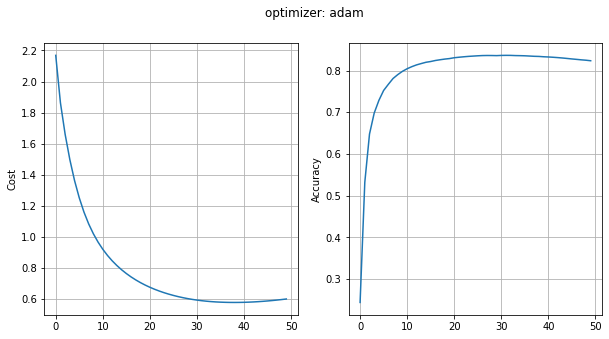

In [28]:
model.plot_cost_accuracy()

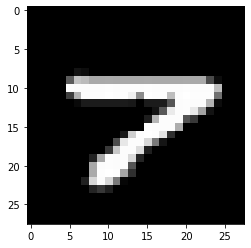

In [31]:
i = 1520
test_image = X_test[i,:]
test_image = np.array(test_image, dtype='float')
pixels = test_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

plt.imsave('test_' + str(i) +'.png', pixels, cmap='gray')
plt.show()

Predicted label is: 7


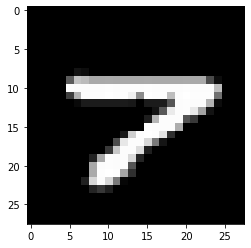

In [32]:
model.test_img('test_' + str(i) +'.png')